In [96]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    data_location = "https://raw.githubusercontent.com/ourownstory/neural_prophet/master/example_data/energy/"
else:
    data_location = "electricity_hourly_dataset_clients/"

# Example on Global Modeling - Energy hourly dataset

In this first section, we will train a 1-step ahead forecaster on energy hourly data. We will use data from different clients to train the model and use data from other clients to test the model.

In [97]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
import matplotlib.pyplot as plt
# set_log_level("ERROR")
train_files=[]
# files = ['df_T1.csv','df_T2.csv','df_T3.csv','df_T4.csv','df_T5.csv','df_T6.csv']
train_files = ['df_T1.csv','df_T2.csv','df_T3.csv','df_T4.csv']
test_files=['df_T5.csv','df_T6.csv']
df_train_list=list()
df_test_list=list()
for files in train_files:
    df_train_list.append(pd.read_csv(data_location + files))
for files in test_files:
    df_test_list.append(pd.read_csv(data_location + files))    

## Ploting dataframes in a weekly frequency

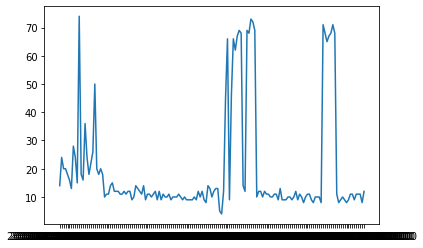

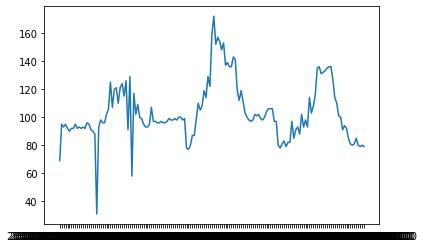

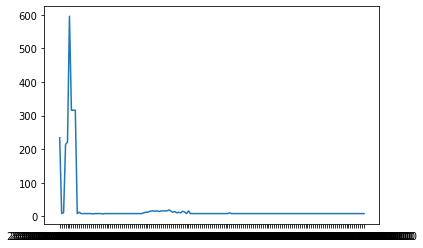

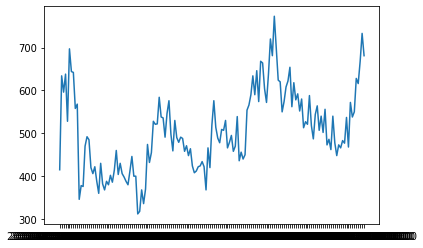

In [98]:
for df in df_train_list:
    df=df.iloc[0:-1:7*24,:] #Resampled weekly
    plt.plot(df.iloc[:,0],df.iloc[:,1])
    plt.show()

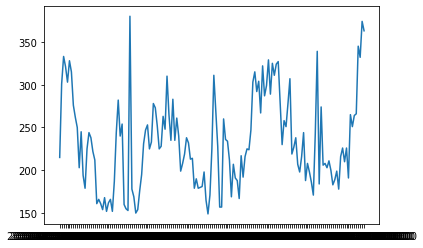

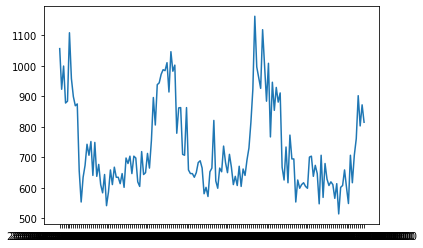

In [99]:
for df in df_test_list:
    df=df.iloc[0:-1:7*24,:] #Resampled weekly
    plt.plot(df.iloc[:,0],df.iloc[:,1])
    plt.show()

In [100]:
m = NeuralProphet(
    n_lags=24,
    # ar_sparsity=0.5,
    #num_hidden_layers = 2,
    #d_hidden=20,
)
metrics = m.fit(df_train_list, freq='W', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 203


  0%|          | 0/236 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.90E-02, min: 2.72E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 1.42E-01
Epoch[203/203]: 100%|██████████| 203/203 [00:22<00:00,  9.17it/s, SmoothL1Loss=0.000734, MAE=13.5, MSE=501, RegLoss=0]


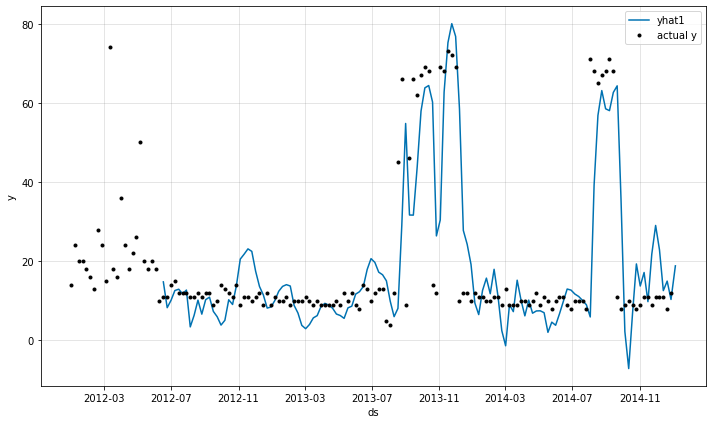

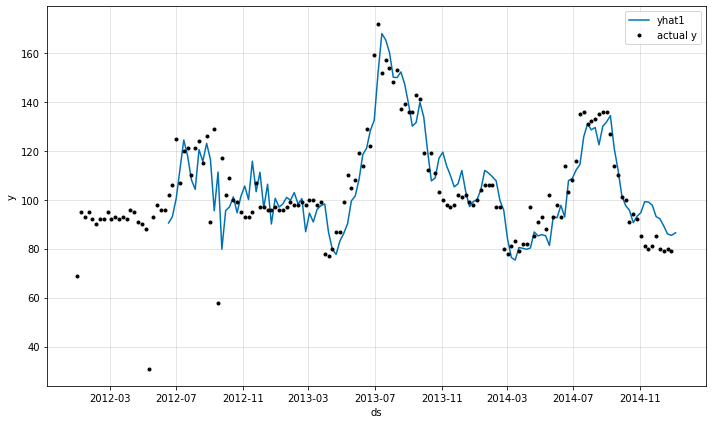

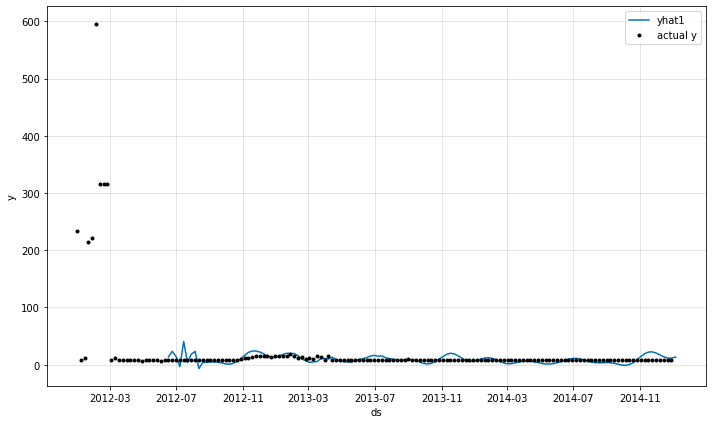

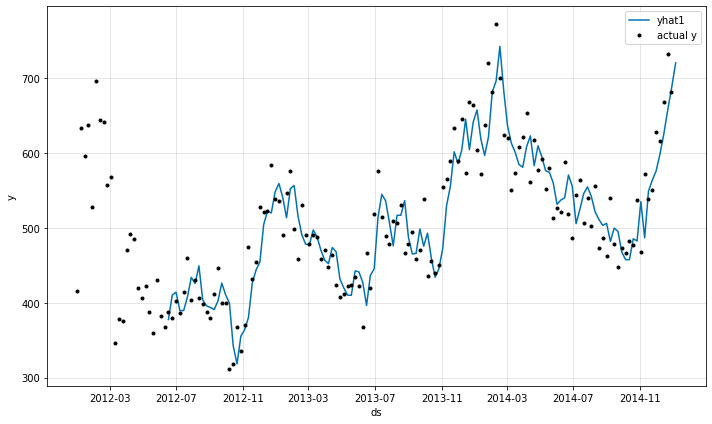

In [101]:
future = m.make_future_dataframe(df_train_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

In [102]:
## df_train, df_val = m.split_df(df_train_list, freq='H',valid_p=0.2) ERROR!
m.test(df_test_list)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE      MSE
1         0.006 45.797 4126.143


,SmoothL1Loss,MAE,MSE
0,0.006049,45.796577,4126.143066


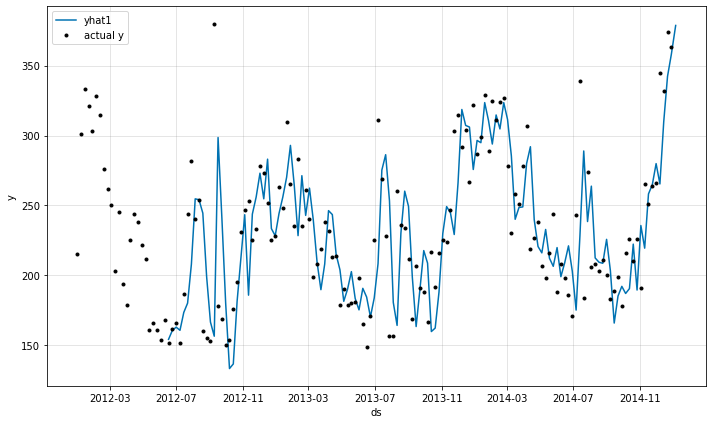

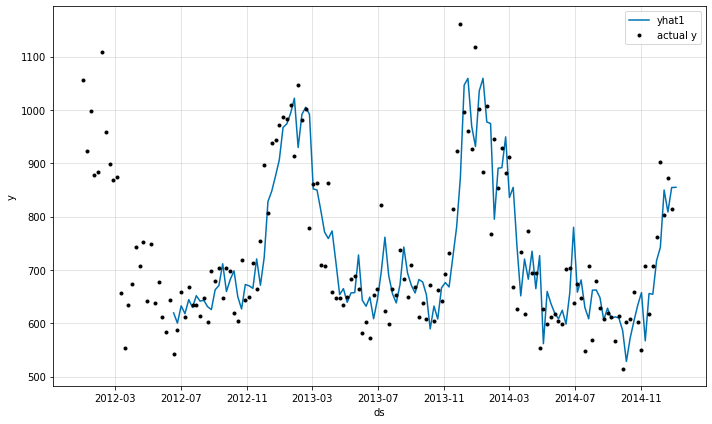

In [103]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

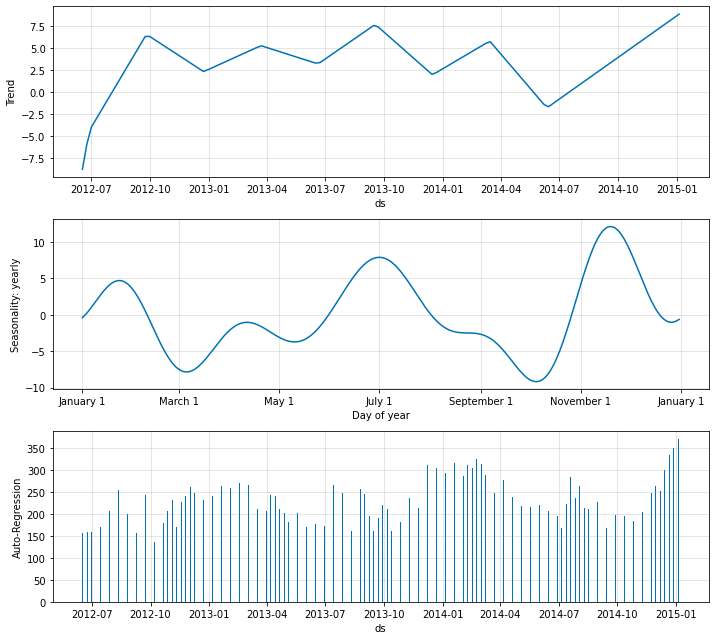

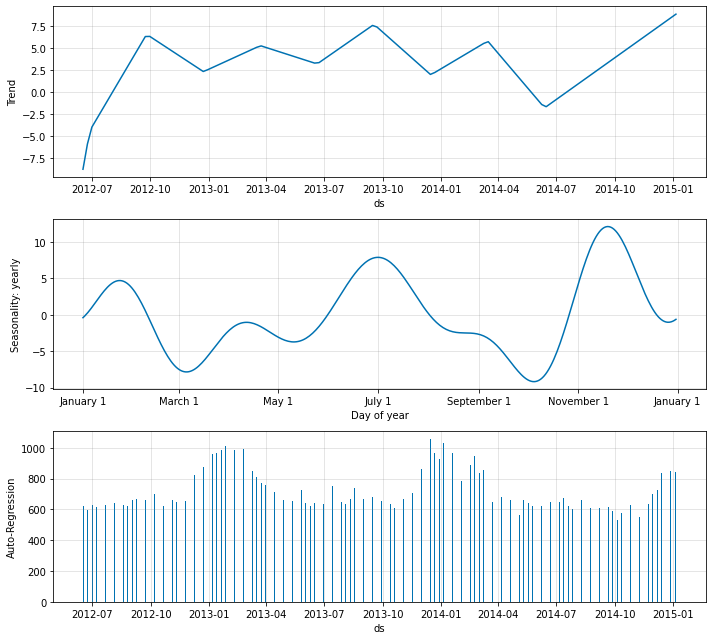

In [104]:
for frst in forecast:
    fig_comp = m.plot_components(frst)

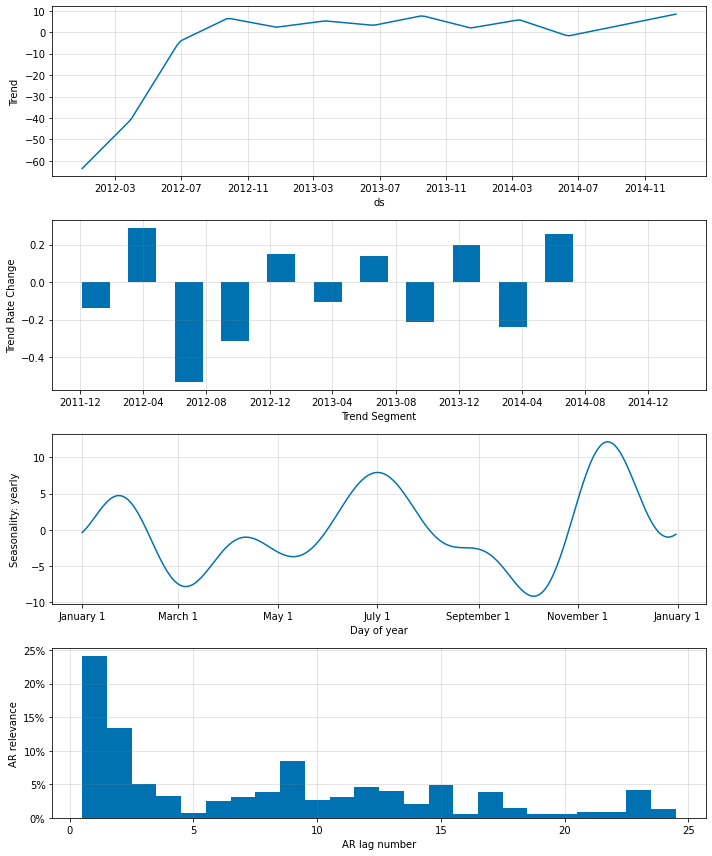

In [105]:
fig_param = m.plot_parameters()

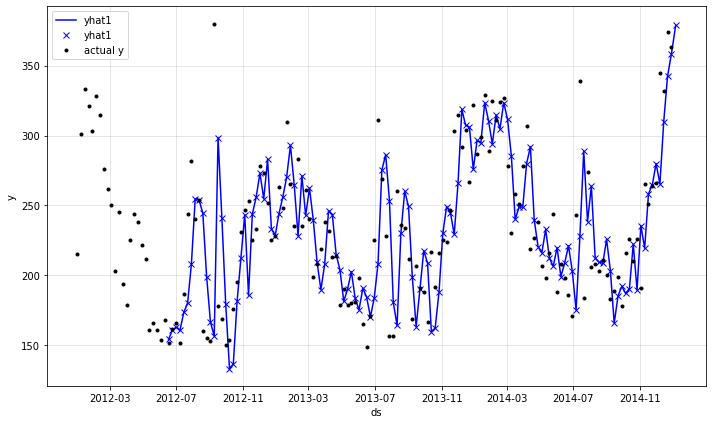

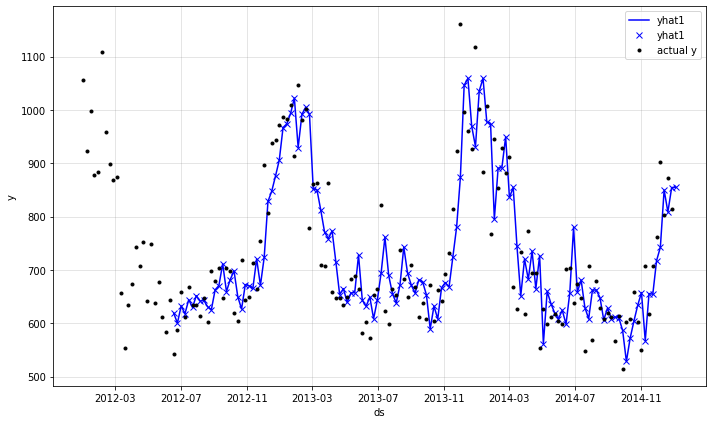

In [106]:
for frst in forecast:
    fig_fit = m.highlight_nth_step_ahead_of_each_forecast(1).plot(frst)


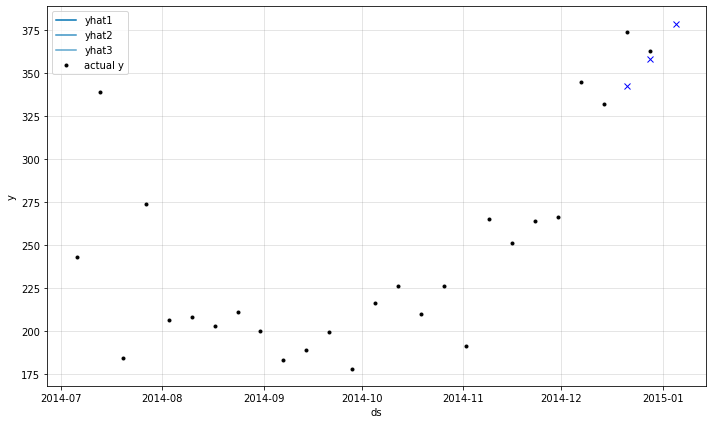

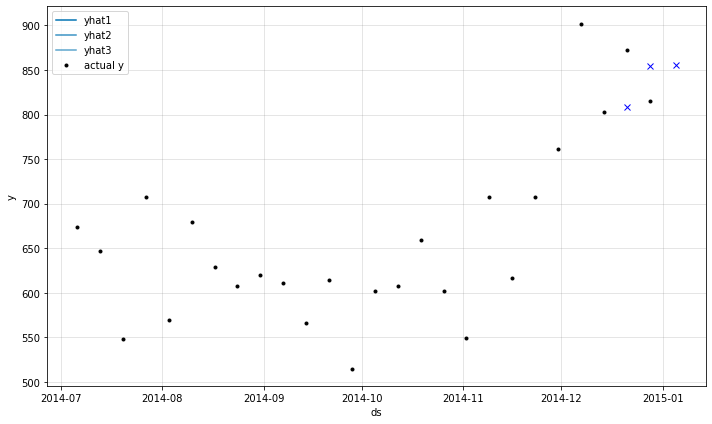

In [107]:
for frst in forecast:
    fig_prediction = m.plot_last_forecast(frst, include_previous_forecasts=2)

...

In [108]:
m = NeuralProphet(
    n_lags=24,
    num_hidden_layers = 2,
    d_hidden=20,
    learning_rate = 0.1
)
metrics = m.fit(df_train_list, freq='W', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 203
Epoch[203/203]: 100%|██████████| 203/203 [00:29<00:00,  6.99it/s, SmoothL1Loss=0.000719, MAE=13.4, MSE=491, RegLoss=0]


In [109]:
m.test(df_test_list)

INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE      MSE
1         0.006 43.854 3839.077


,SmoothL1Loss,MAE,MSE
0,0.005628,43.8545,3839.07666


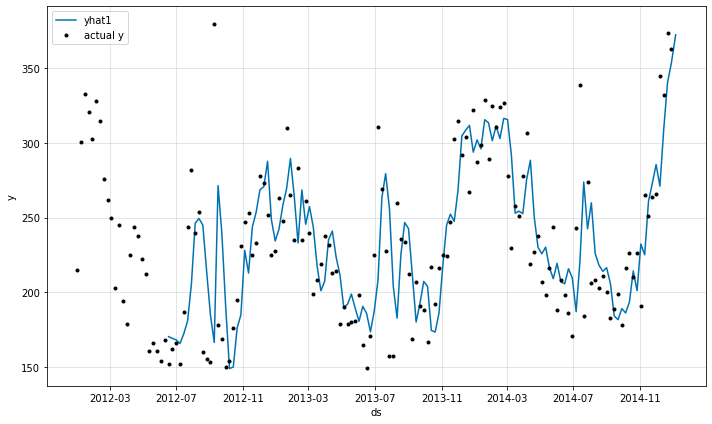

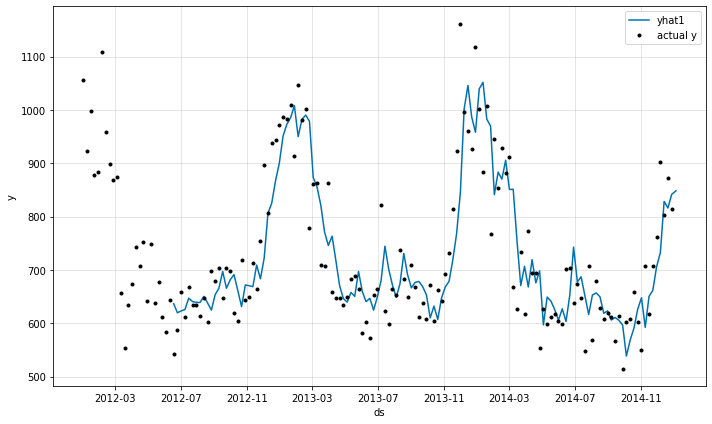

In [110]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

...

In [111]:
m = NeuralProphet(
    n_lags=24,
    # ar_sparsity=0.5,
    num_hidden_layers = 2,
    d_hidden=20,
    learning_rate = 0.001
)
metrics = m.fit(df_train_list, freq='W', valid_p = 0.2)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 203
Epoch[203/203]: 100%|██████████| 203/203 [00:29<00:00,  6.98it/s, SmoothL1Loss=0.000994, MAE=18.3, MSE=678, RegLoss=0]


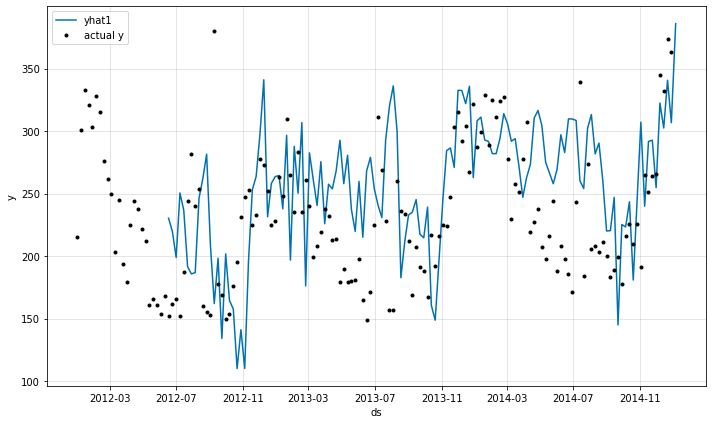

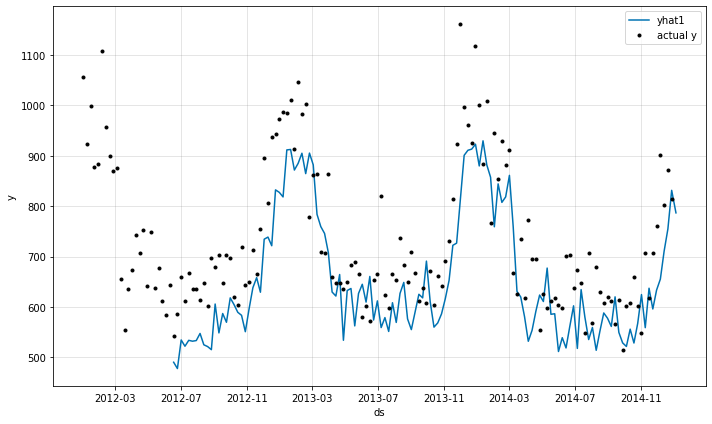

In [112]:
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

In [140]:
m = NeuralProphet(n_lags=2)
metrics = m.fit(df_train_list, freq='D', valid_p = 0.2)

# OBS> Setting different freq is not working for n_lags=0

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 125


  0%|          | 0/282 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.06E-02, min: 1.20E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 5.07E-01
Epoch[125/125]: 100%|██████████| 125/125 [00:44<00:00,  2.79it/s, SmoothL1Loss=0.00148, MAE=14.6, MSE=869, RegLoss=0]


INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE      MSE
1         0.004 35.692 2532.044


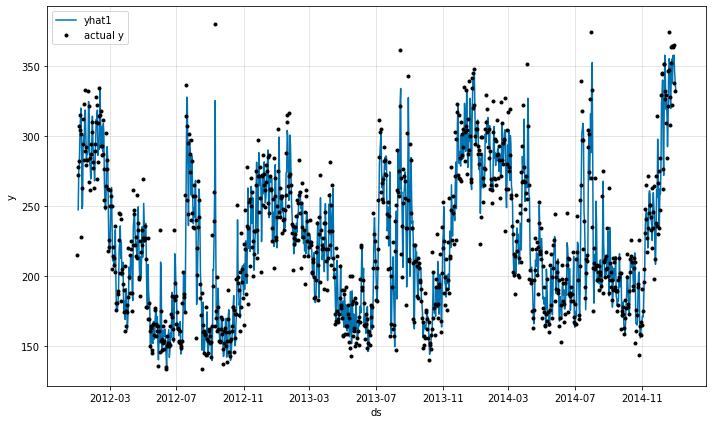

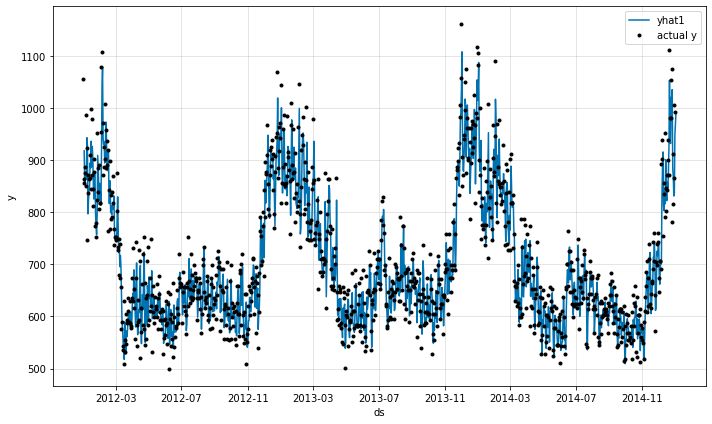

In [141]:
m.test(df_test_list)
future = m.make_future_dataframe(df_test_list, n_historic_predictions=True)
forecast = m.predict(future)
for frst in forecast:
    fig = m.plot(frst)

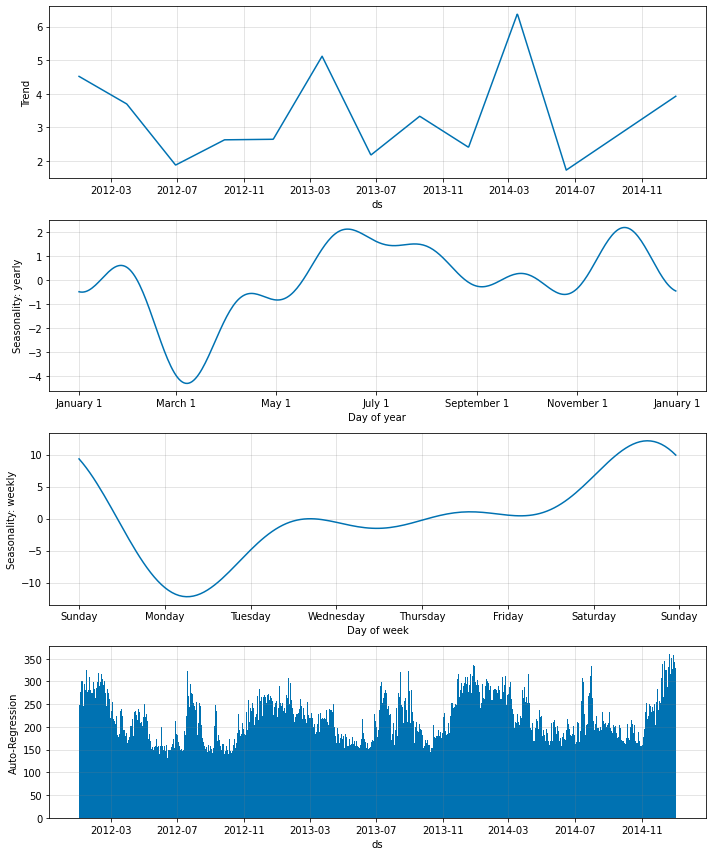

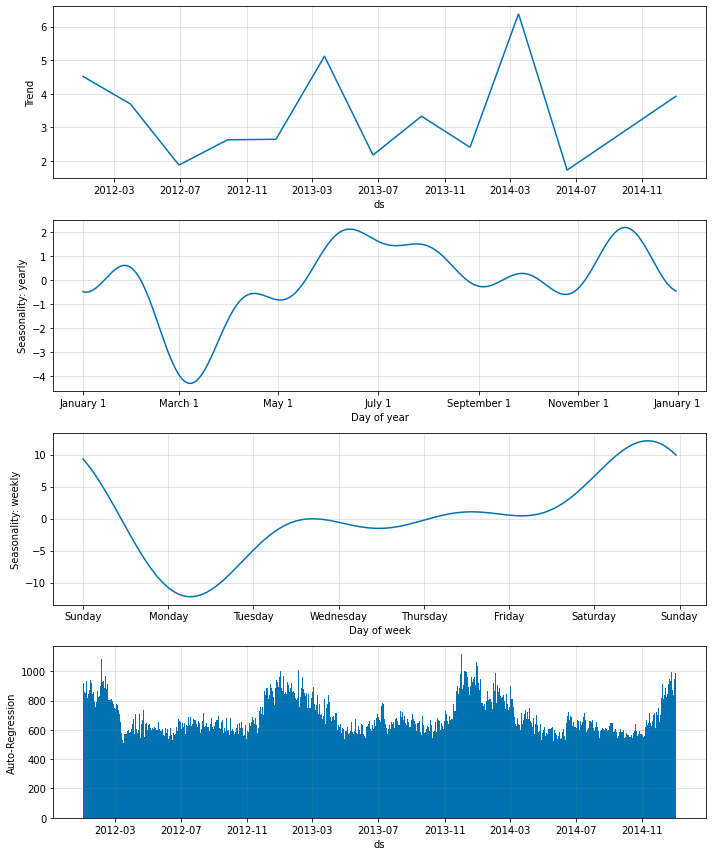

In [142]:
for frst in forecast:
    fig_comp = m.plot_components(frst)